In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df = pd.read_csv('fulldata.csv')

In [5]:
df

,年份,城市,新建商品住宅价格（元/m^2）,人口（万人）,类型,平均工资（元）,M2(亿元)
0,2019,北京,23667.934020,2153.60,常住人口,173205.00,1918385.98
1,2019,天津,17552.821370,1561.83,常住人口,111602.00,1918385.98
2,2019,石家庄,9105.739406,1103.12,常住人口,78937.00,1918385.98
3,2019,太原,14886.494060,446.19,常住人口,82860.00,1918385.98
4,2019,呼和浩特,3609.250277,313.70,年末常住人口,84105.00,1918385.98
...,...,...,...,...,...,...,...
891,2006,韶关,172.364208,290.94,常住人口,20033.73,322611.51
892,2006,桂林,172.282071,488.06,常住人口,17613.40,322611.51
893,2006,北海,5.519726,157.62,常住人口,15095.79,322611.51
894,2006,三亚,12.698696,524170.00,户籍人口,18490.47,322611.51


In [8]:
reg = linear_model.LinearRegression()

In [9]:
reg.fit(df[['人口（万人）','平均工资（元）','M2(亿元)']],df[['新建商品住宅价格（元/m^2）']])

LinearRegression()

In [10]:
reg.coef_

array([[-1.00135264e-05,  9.61634258e-02, -9.19212297e-04]])

In [11]:
reg.intercept_

array([-2538.12924153])

# by city

In [6]:
df_mean = df.groupby(['城市']).mean()

In [7]:
df_mean

,年份,新建商品住宅价格（元/m^2）,人口（万人）,平均工资（元）,M2(亿元)
城市,,,,,
三亚,2012.5,2189.147377,5.750088e+05,48094.139286,1030796.515
上海,2012.5,5703.180984,2.311087e+03,91936.447857,1030796.515
丹东,2012.5,472.174813,2.393571e+02,31711.643571,1030796.515
乌鲁木齐,2012.5,1169.461188,2.425750e+02,55396.347143,1030796.515
九江,2012.5,503.433955,4.799051e+06,39907.712857,1030796.515
...,...,...,...,...,...
银川,2012.5,127.788320,1.988200e+06,55506.193571,1030796.515
长春,2012.5,613.621067,7.528800e+02,50539.362857,1030796.515
长沙,2012.5,400.187419,7.213393e+02,56649.422857,1030796.515


In [21]:
reg.fit(df_mean[['人口（万人）','平均工资（元）','M2(亿元)']],df_mean[['新建商品住宅价格（元/m^2）']])

LinearRegression()

In [22]:
reg.coef_

array([[-1.55361288e-05,  7.98448538e-02, -1.52903796e-16]])

In [23]:
reg.intercept_

array([-2613.81671192])

# by time

In [12]:
df_time = df.groupby(['年份']).mean()

In [13]:
df_time

,新建商品住宅价格（元/m^2）,人口（万人）,平均工资（元）,M2(亿元)
年份,,,,
2006,56.849492,417958.262969,21630.386875,322611.51
2007,124.682381,424178.349219,25389.882031,379224.30
2008,242.639265,428242.504844,29278.408750,442138.92
2009,349.944806,432049.818281,32612.093594,559817.56
2010,847.111482,442590.721875,36713.929062,674960.52
2011,938.767750,445797.803438,41624.976406,780405.72
2012,468.139395,447885.063594,46848.517500,914693.42
2013,615.156740,450387.436250,54076.426250,1050214.13
2014,792.545181,454304.165312,56745.747812,1183890.00


In [17]:
reg.fit(df_time[['人口（万人）','平均工资（元）','M2(亿元)']],df_time[['新建商品住宅价格（元/m^2）']])

LinearRegression()

In [18]:
reg.coef_

array([[-0.09666658,  0.64540699, -0.02054867]])

In [19]:
reg.intercept_

array([32529.00791954])

# single city with time

In [24]:
df_beijing = df[df['城市']=='北京']

In [25]:
df_beijing

,年份,城市,新建商品住宅价格（元/m^2）,人口（万人）,类型,平均工资（元）,M2(亿元)
0,2019,北京,23667.934020,2153.6,常住人口,173205.00,1918385.98
64,2018,北京,16271.579360,2154.2,常住人口,149843.00,1770223.58
128,2017,北京,16300.373300,2170.7,常住人口,134994.00,1626456.20
192,2016,北京,7643.310796,2172.9,常住人口,122749.00,1483618.25
256,2015,北京,1046.264592,2170.5,常住人口,113073.00,1324511.12
320,2014,北京,1034.169895,2151.6,常住人口,103400.00,1183890.00
384,2013,北京,561.001462,2114.8,常住人口,93997.00,1050214.13
448,2012,北京,146.532335,2069.3,常住人口,85306.02,914693.42
512,2011,北京,156.201594,2018.6,常住人口,75834.61,780405.72
576,2010,北京,109.116057,1961.9,常住人口,65683.00,674960.52


In [26]:
reg.fit(df_beijing[['人口（万人）','平均工资（元）','M2(亿元)']],df_beijing[['新建商品住宅价格（元/m^2）']])

LinearRegression()

In [27]:
reg.coef_

array([[-3.17886026e+01,  2.65304655e-01,  2.83238598e-03]])

In [28]:
reg.intercept_

array([40549.23982948])

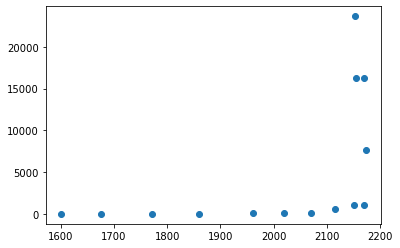

In [31]:
x = df_beijing[['人口（万人）']]
y = df_beijing[['新建商品住宅价格（元/m^2）']]
plt.scatter(x,y)

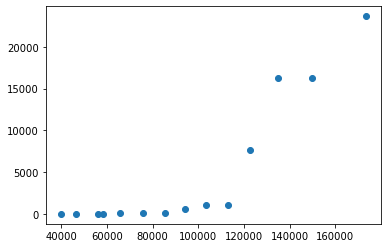

In [32]:
x = df_beijing[['平均工资（元）']]
y = df_beijing[['新建商品住宅价格（元/m^2）']]
plt.scatter(x,y)

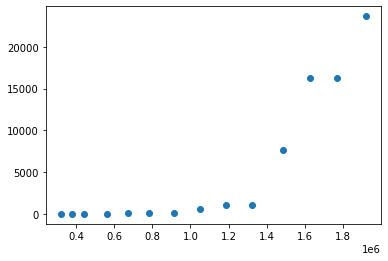

In [33]:
x = df_beijing[['M2(亿元)']]
y = df_beijing[['新建商品住宅价格（元/m^2）']]
plt.scatter(x,y)